Автор: Гибзун Максим
tg: @maximgibzun

# Исследование объявлений о продаже квартир



**Описание проекта:**  
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**  
Провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. 
  
**Задачи исследования:**
- Загрузить данные и подготовить их к анализу.
- Проанализировать полученные данные.
- Выделить особенности рынка недвижимости в Санкт-Петербурге и Ленинградской области.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t' )
print('Первые 5 строк таблицы:')
display(data.head()) # первые 5 строк таблицы
#print('--------------------------------------------------------------------------------')
#print('Названия столбцов:')
#print(data.columns) # выводит названия столбцов
#print('--------------------------------------------------------------------------------')
#print('Размер таблицы:')
#print(data.shape) # выводит размер таблицы
#print('--------------------------------------------------------------------------------')
#print('Типы данных в таблице:')
#print(data.dtypes) # выводит информацию о типах данных в таблице
print('--------------------------------------------------------------------------------')
print('Сводная информация о таблице:')
data.info() # метод выводит сводную информацию о таблице
print('--------------------------------------------------------------------------------')
print('Количество продублированных строк:', data.duplicated().sum()) # проверка дубликатов


Первые 5 строк таблицы:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


--------------------------------------------------------------------------------
Сводная информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony   

**Описание данных:**  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

В датафрейме `data` 23699 строк и 22 колонки.  
Имеется много пропущенных значений, не все типы данных указаны корректно, полностью дублированные строки отсутствуют.

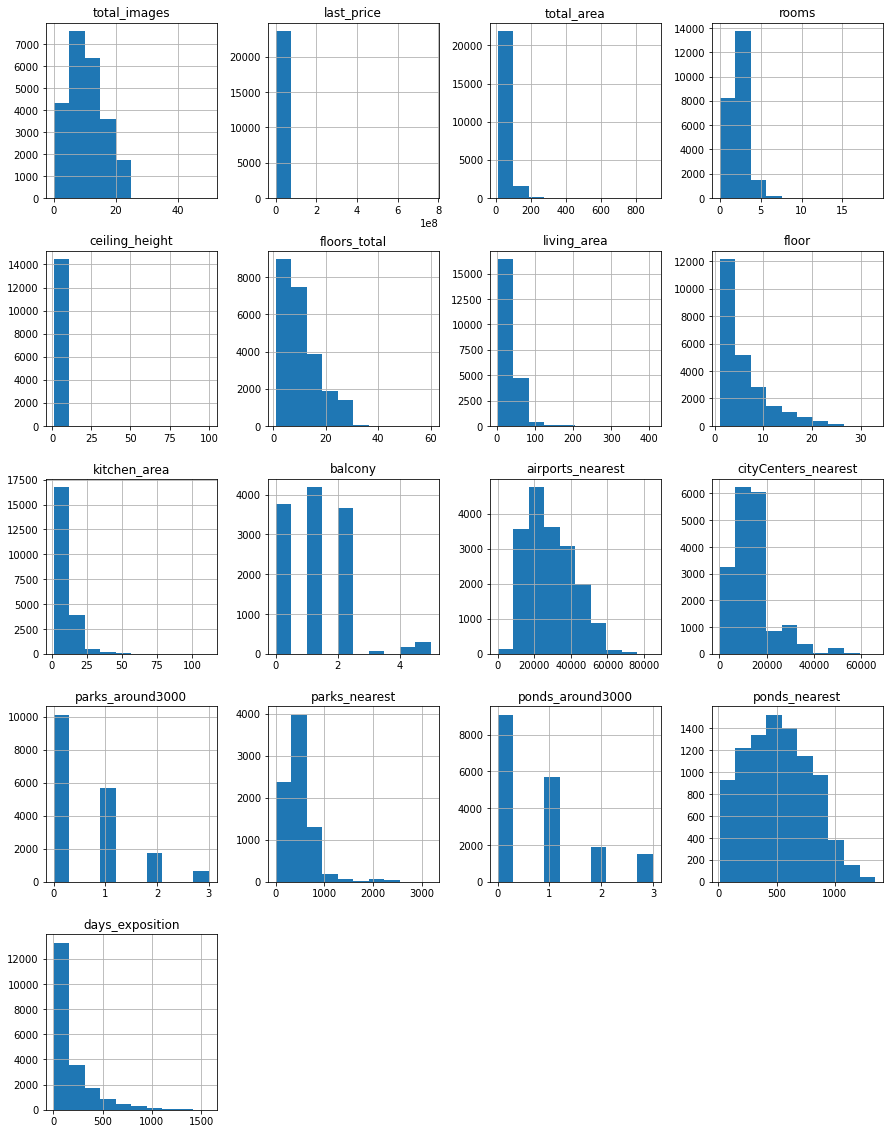

In [2]:
data.hist(figsize=(15, 20));

Большинство графиков построенных по пользовательским данным неинформативны, возможно из-за ошибок в данных (выбросы, ошибочные значения, пропуски). Графики, построенные по картографическим данным выглядят реалистично.

### Предобработка данных

**Анализ пропущенных значений:**  
- ceiling_height. Пропущено 9195 значений. Можно восстановить медианным значением.  
- floors_total. Пропущено 86 значений. Для восстановления используем значение floor. Количество пропусков небольшое и ошибка в floors_total сильно не повлияет на результаты анализа.  
- living_area. Пропущено 1903 значения. Можно заполнить, посчитав по имеющимся данным коэффициент living_area / total_area.  
- is_apartment. Пропущено 20924 значений. Если значение пропущено, будем считать что это не аппартаменты. Пропуски заменим на False.  
- kitchen_area. Пропущено 2278 значений. Можно заполнить, посчитав по имеющимся данным коэффициент kitchen_area / total_area.  
- balcony. Пропущено 9195 значений. Пропуски можно заменить 0, так как если продавец не указал количество балконов, скорее всего их нет.  
- locality_name. Пропущено 49 значений. Так как количество пропусков небольшое (0,2% от всех строк) удалим эти строки. Восстановить название населённого пункта невозможно, но этот параметр сильно влияет на цену недвижимости.  

  
Значения выше были введены пользователями. Скорее всего пропуски появились из-за невнимательности или нежелания вводить некоторые данные в объявлении. Часть пропусков можно предотвратить, указав обязательны поля и предложив выбрать пользователю ответ из списка. Например: Число балконов = [0, 1, 2, 3, 4 и более]. Апартаменты = [Да, Нет] (Да=True, Нет=False). И т.д.  
  
  

- airports_nearest. Пропущено 5542 значения. Данные картографические, пропуски не восстановить.  
- cityCenters_nearest. Пропущено 5519 значений. Данные картографические, пропуски не восстановить.   
- parks_around3000. Пропущено 5518 значений. Данные картографические, пропуски не восстановить.  
- parks_nearest. Пропущено 15620 значений. Данные картографические, пропуски не восстановить.  
- ponds_around3000. Пропущено 5518 значений. Данные картографические, пропуски не восстановить.  
- ponds_nearest. Пропущено 14589 значений. Данные картографические, пропуски не восстановить.  
  
Значения выше картографические. Скорее всего пропуски появились из-за неккоректно указанного населённого пункта. Можно предложить пользователю выбирать населённый пункт из списка, или указать на карте.  
  
  
days_exposition       20518. Пропущено 3181 значение. Значение должно получаться автоматически: дата снятия с публикации - дата публикации. Возможно значения пропущены в связи с тем что объявление актуально и не снято с публикации. Оставим как есть.

In [3]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True) # удалим строки с недостающими значениями в столбце locality_name и обновим индексы
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # заменим пропущенные значения медианой
data['floors_total'] = data['floors_total'].fillna(data['floor']) # заменим пропущенные значения этажности значением из столбца floor 
ratio_living_area = data['living_area'].mean() / data['total_area'].mean() 
#print(ratio_living_area) # получили значение 0.57 - правдоподобно.
data['living_area'] = data['living_area'].fillna(data['total_area']*ratio_living_area).round(decimals=1)
#print(data['is_apartment'].value_counts()) # значения либо False, либо True
data['is_apartment'] = data['is_apartment'].fillna(False)
#print(data['is_apartment'].value_counts()) #проверка
ratio_kitchen_area = data['kitchen_area'].mean() / data['total_area'].mean() 
#print(ratio_kitchen_area) # получили значение 0.18 - правдоподобно.
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*ratio_kitchen_area).round(decimals=1)
data['balcony'] = data['balcony'].fillna(0) # заменим пропущенные значения на 0
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски, которые можно восстановить логическим путём восстановлены.

**Анализ типов данных:**  
last_price можно перевести из рублей, в миллионы рублей, так как цифры большие и сложно читаемые. 
first_day_exposition следует перревести в тип datetime.  
floors_total следует перевести в int, так как не может быть дробного числа этажей.  
is_apartment сам перевёлся в bool, после подстановки пропущенных значений.  
balcony следует перевести в int, так как не может быть дробного числа балконов.    

In [4]:
data['last_price'] = data['last_price']/1000000
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d') # отбросим часы, минуты и секунды, так как эти данные лишние.
#print(data['floors_total'].value_counts()) # проверим какие значения встречаются в столбце.
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
print(data.dtypes)

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object


Типы данных приведены в порядок.

**Анализ неявных дубликатов:**  
Выясним какие есть повторяющиеся названия населённых пунктов в столбце `locality_name`


In [5]:
print('Количество уникальных названий населённых пунктов:', len(data['locality_name'].unique()),
      '\n Список уникальных населённых пунктов: \n', data['locality_name'].unique(), )

Количество уникальных названий населённых пунктов: 364 
 Список уникальных населённых пунктов: 
 ['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 

Получился длинный, сложный для анализа список населённых пунктов. Сократим список, приведя все названия к одному регистру и заменив типы поселений (деревня, село, поселок, посёлок и т.д.) на `ленинградская область,`. Отсортируем список по алфавиту.

In [6]:
data['locality_name'] = data['locality_name'].str.lower()
duplicates = ['городской посёлок', 'городской поселок', 'садоводческое некоммерческое товарищество' 'деревня', 'посёлок городского типа', 'поселок городского типа',
            'деревня', 'посёлок станции', 'поселок станции', 'посёлок при железнодорожной станции', 'поселок при железнодорожной станции',
              'коттеджный поселок', 'коттеджный посёлок', 'садовое товарищество', 'посёлок', 'поселок', 'село'] # список редактируемых названий
name = 'лен. обл.,' # правильное название
for value in duplicates:
    data['locality_name'] = data['locality_name'].str.replace(value, name) # замена всех значений из duplicates на name
print('Количество уникальных названий населённых пунктов:', len(data['locality_name'].unique()),
      '\n Список уникальных населённых пунктов: \n', data.sort_values(by='locality_name')['locality_name'].unique(), )

Количество уникальных названий населённых пунктов: 309 
 Список уникальных населённых пунктов: 
 ['бокситогорск' 'волосово' 'волхов' 'всеволожск' 'выборг' 'высоцк'
 'гатчина' 'зеленогорск' 'ивангород' 'каменногорск' 'кингисепп' 'кириши'
 'кировск' 'колпино' 'коммунар' 'красное лен. обл.,' 'кронштадт' 'кудрово'
 'лен. обл., агалатово' 'лен. обл., александровская'
 'лен. обл., алексеевка' 'лен. обл., аннино' 'лен. обл., аро'
 'лен. обл., барышево' 'лен. обл., батово' 'лен. обл., бегуницы'
 'лен. обл., белогорка' 'лен. обл., белоостров' 'лен. обл., большая вруда'
 'лен. обл., большая ижора' 'лен. обл., большая пустомержа'
 'лен. обл., большие колпаны' 'лен. обл., большое рейзино'
 'лен. обл., большой сабск' 'лен. обл., бор' 'лен. обл., борисова грива'
 'лен. обл., бугры' 'лен. обл., будогощь' 'лен. обл., ваганово'
 'лен. обл., важины' 'лен. обл., вартемяги' 'лен. обл., вахнова кара'
 'лен. обл., вещево' 'лен. обл., виллози' 'лен. обл., вознесенье'
 'лен. обл., возрождение' 'лен. обл., вой

Удалось снизить количество уникальных названий с 364 до 309. Значит сократили 55 неявных дубликатов в названиях населённых пунктов.

**Обработка аномальных значений:**
Посмотрим описание данных в таблице.

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127,60.329069,2.070106,2.724311,10.673784,34.582482,5.893277,10.503053,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,10.896399,35.661808,1.078620,0.989255,6.593455,22.359557,4.883317,6.037303,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,0.012190,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,763.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- total_images от 0 до 50. Правдоподобно.
- last_price **минимальная цена 12190, аномально низкая цена для недвижимости.** Максимальная цена 763 миллиона, возможно это элитное жильё.
- total_area от 12м.кв. - возможно продают комнату или маленькую студию. До 900м.кв - возможна продают большой дом.
- rooms **минимальное значение 0 - странно, нужно дополнительно проанализировать.** Максимальное значение 19 - возможно для большого дома.
- ceiling_height **минмальное значение 1 метр, а максимальное 100 метров.** Оба значения аномальные и нуждаются в проверке.
- floors_total значения этажности от 1 до 60. Правдоподобно.
- living_area значения жилой площади от 2м.кв до 409м.кв. **2м.кв - аномальное значение**, нужно проанализировать.
- floor этаж от 1 до 33. Правдоподобно.
- kitchen_area значения площади кухни от 1,3 м.кв до 112м.кв. **1,3м.кв - аномальное значение**, нужно проанализировать.
- balcony количество балконов от 0 до 5. Правдоподобно.
- картографические данные: airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest правдободобны.
- days_exposition дни до снятия с публикации от 1 до 1580. Правдободобно.

**Проанализируем аномально низкие значения last_price:**

<AxesSubplot:>

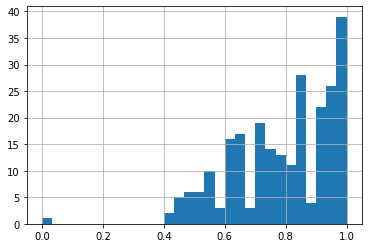

In [8]:
data['last_price'].hist(bins=30 ,range=(0, 1))

На гистограмме в диапазоне цен от 0 до 1млн видно что цены начинаются от 0.4млн, а одно значение выбивается.

In [9]:
display(data.query('last_price < 0.4'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8778,7,0.01219,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Недвижимость в Санкт-Петербурге площадью 109м.кв. не может стоить 12190руб., скорее всего пользователь хотел указать цену 12190000 руб.  
Исправим это, домножив цену на 1000.

In [10]:
data.loc[8778, 'last_price'] = data.loc[8778, 'last_price']*1000
print(data.loc[8778, 'last_price'])

12.19


Убедимся что в ценовой категории до 1млн недвижимость в Санкт-Петербурге не продаётся.

In [11]:
print(data.query('last_price < 1').sort_values(by='locality_name')['locality_name'].unique())

['бокситогорск' 'волхов' 'всеволожск' 'выборг' 'гатчина' 'ивангород'
 'каменногорск' 'кингисепп' 'кириши' 'лен. обл., белогорка'
 'лен. обл., большая вруда' 'лен. обл., большой сабск' 'лен. обл., бор'
 'лен. обл., будогощь' 'лен. обл., важины' 'лен. обл., вахнова кара'
 'лен. обл., вещево' 'лен. обл., володарское' 'лен. обл., вырица'
 'лен. обл., выскатка' 'лен. обл., гаврилово' 'лен. обл., глажево'
 'лен. обл., громово' 'лен. обл., дубровка' 'лен. обл., елизаветино'
 'лен. обл., ефимовский' 'лен. обл., житково' 'лен. обл., извара'
 'лен. обл., калитино' 'лен. обл., кондратьево' 'лен. обл., коркино'
 'лен. обл., котельский' 'лен. обл., красная долина'
 'лен. обл., кузнечное' 'лен. обл., курковицы' 'лен. обл., лужайка'
 'лен. обл., малая романовка' 'лен. обл., никольский' 'лен. обл., оредеж'
 'лен. обл., паша' 'лен. обл., пельгора' 'лен. обл., плодовое'
 'лен. обл., почап' 'лен. обл., пустынка' 'лен. обл., пчевжа'
 'лен. обл., ромашки' 'лен. обл., свирь' 'лен. обл., серебрянский'
 'лен.

Гипотеза подтверждена. До 1млн можно купить недвижимость только в области.

**Проанализируем аномально низкие значения rooms:**  
Так как 75% значений до 3 комнат включительно, акцентируем внимание на диапазон 0-3 комнаты.

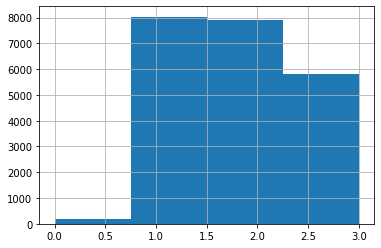

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2.450,27.00,2017-03-30,0,2.65,24,15.5,2,False,True,False,4.7,2,"лен. обл., мурино",NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2.320,25.00,2017-09-27,0,2.65,14,17.0,1,False,False,True,4.4,0,"лен. обл., кудрово",NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2.480,27.11,2018-03-12,0,2.65,17,24.8,4,False,True,False,4.7,2,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3.375,34.40,2017-03-28,0,2.65,26,24.3,19,False,False,True,6.0,1,"лен. обл., парголово",53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1.850,25.00,2019-02-20,0,2.65,10,14.3,7,False,True,False,4.4,0,"лен. обл., шушары",NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23162,7,3.200,26.00,2017-09-01,0,2.65,25,18.0,16,False,True,False,4.6,0,санкт-петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23393,0,2.500,27.70,2017-09-28,0,2.65,24,18.0,4,False,False,True,4.9,2,"лен. обл., мурино",NaN,NaN,NaN,NaN,NaN,NaN,4.0
23505,15,3.350,26.00,2018-09-07,0,2.65,19,14.8,8,False,True,False,4.6,0,санкт-петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23543,10,1.450,29.00,2017-11-11,0,2.65,9,18.0,8,False,False,True,5.1,2,никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,197.000000,197.000000,197.000000,197.0,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,118.000000,118.000000,118.000000,29.000000,118.000000,69.000000,183.000000
mean,7.776650,3.337724,29.279746,0.0,2.839086,16.812183,19.580203,8.578680,5.129949,1.010152,24516.432203,13388.610169,0.296610,594.862069,0.822034,526.043478,109.180328
std,5.079055,5.046022,25.855264,0.0,1.749501,6.923065,15.183915,6.290595,4.528613,0.925764,12386.969865,5028.479861,0.559446,302.820164,0.873458,274.811509,158.847377
min,0.000000,0.945750,15.500000,0.0,2.500000,3.000000,2.000000,1.000000,2.700000,0.000000,6989.000000,1261.000000,0.000000,38.000000,0.000000,72.000000,3.000000
25%,4.000000,2.300000,24.050000,0.0,2.650000,12.000000,16.000000,3.000000,4.200000,0.000000,14567.000000,11618.000000,0.000000,396.000000,0.000000,348.000000,27.500000
50%,7.000000,2.700000,26.050000,0.0,2.650000,17.000000,18.000000,7.000000,4.600000,1.000000,21460.000000,13595.500000,0.000000,535.000000,1.000000,528.000000,50.000000
75%,11.000000,3.380000,28.400000,0.0,2.700000,23.000000,19.600000,13.000000,5.000000,2.000000,34004.750000,16383.750000,0.000000,761.000000,1.000000,674.000000,117.500000
max,21.000000,71.000000,371.000000,0.0,27.000000,35.000000,211.800000,26.000000,65.000000,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000


In [12]:
data['rooms'].hist(bins=4, range=(0,3)) # посмотрим распределение комнат
plt.show()
display(data.query('rooms == 0')) # посмотрим количество и характеристики объектов с нулём комнат
data.query('rooms == 0').describe()


Проанализировав данные недвижимости с нулём комнат можно сделать вывод, что это квартиры с небольшой площадью (75% площадь менее 28.4 м.кв.), квартиры - студии и квартиры с открытой планировкой. Скорее всего количество комнат 0 было указано вследствии пользовательской ошибки. Так как это квартиры с небольшой площадью заменим количество комнат 0 на 1.

In [13]:
data[data['rooms'] == 0] = data[data['rooms'] == 0].replace(0,1)
data['rooms'].describe()

count    23650.000000
mean         2.078436
std          1.066393
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Проанализируем аномально низкие значения ceiling_height:**  

In [14]:
data.sort_values(by='ceiling_height')['ceiling_height'].unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Значения менее 2 метров похожи на опечатки. Возможно пользователи вместо цифры 2 нажали на цифру 1. Также потолки 20 метров и более мало похожи на правду, возможно пользователи ошиблись с разрядностью. Поделим значения высоких потолков на 10, а к низким потолкам прибавим 1 метр.

In [15]:
#display(data[data['ceiling_height'] < 2]) # найдем строки, где высота потлков менее 2м.
#display(data[data['ceiling_height'] >= 20]) # найдем строки, где высота потлков 20 и более метров.
def ceiling_height_corr(row):
    height=row['ceiling_height']
    
    try:
        if height < 2:
            return height+1
        elif height >= 20:
            return height/10
        else:
            return height
    except:
        pass

data['ceiling_height'] = data.apply(ceiling_height_corr, axis=1)
data.sort_values(by='ceiling_height')['ceiling_height'].unique()

array([ 2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,
        2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,
        2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,
        2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,
        2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,
        2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,
        2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,
        3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,
        3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,
        3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,
        3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,
        3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,
        3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,
        3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,
        3.68,  3.69,

Таким образом мы избавились от аномально низких и высоких потолков.

**Проанализируем аномально низкие значения living_area и kitchen_area:**  
Согласно действующим СНиПам, минимальная площадь жилой комнаты должна быть не менее 8 кв.м., а площадь кухни не менее 5 кв.м.

In [16]:
print(data.query('living_area < 8').sort_values(by='living_area')['living_area'].unique())
print(data.query('kitchen_area < 5').sort_values(by='kitchen_area')['kitchen_area'].unique())
display(data.query('living_area < 8' or 'kitchen_area < 5'))
data.query('living_area < 8' or 'kitchen_area < 5').describe()

[2.  3.  5.  5.4 6.  6.5 7.4 7.5]
[1.3 2.  2.1 2.3 2.4 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3238,7,4.440,41.0,2017-07-02,1,2.65,17,3.0,17,False,False,False,11.0,0,санкт-петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13892,20,6.350,52.0,2018-02-06,2,3.00,6,2.0,2,False,False,False,9.0,0,санкт-петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
16404,13,3.799,31.0,2018-04-12,1,2.60,5,6.0,1,False,False,False,17.0,0,санкт-петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
17551,11,2.680,22.0,2018-08-11,1,2.65,25,5.0,8,False,True,False,3.9,2,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
17929,3,1.400,13.0,2017-12-03,1,2.60,9,7.4,1,False,False,False,2.3,0,санкт-петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19216,19,4.050,33.0,2018-10-15,1,2.50,22,6.5,21,False,False,False,18.0,0,санкт-петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
19511,3,1.850,13.0,2019-03-11,1,3.40,5,7.4,2,False,False,False,2.3,0,санкт-петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19523,2,1.686,13.2,2018-12-17,1,2.65,5,7.5,1,False,False,False,2.3,0,санкт-петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
21714,1,2.330,23.0,2018-01-01,1,2.65,24,2.0,22,False,True,False,4.0,1,"лен. обл., мурино",NaN,NaN,NaN,NaN,NaN,NaN,66.0
21898,15,6.100,77.6,2019-02-28,4,2.50,9,5.4,1,False,False,False,9.8,0,санкт-петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000,7.000000,10.000000,5.000000,11.000000
mean,9.818182,9.061364,41.618182,1.545455,2.745455,12.272727,5.018182,7.636364,8.690909,0.363636,23764.400000,8946.800000,0.700000,563.142857,0.700000,420.800000,129.181818
std,6.954397,18.626395,37.749432,1.035725,0.275186,8.088151,2.172012,8.441241,6.190873,0.674200,8192.375265,4052.436792,0.483046,160.723809,0.948683,397.534527,126.218713
min,1.000000,1.400000,13.000000,1.000000,2.500000,5.000000,2.000000,1.000000,2.300000,0.000000,9258.000000,4165.000000,0.000000,361.000000,0.000000,100.000000,19.000000
25%,3.000000,2.090000,17.600000,1.000000,2.600000,5.500000,3.000000,1.000000,3.100000,0.000000,19426.750000,5606.000000,0.250000,444.000000,0.000000,155.000000,38.500000
50%,11.000000,3.799000,31.000000,1.000000,2.650000,9.000000,5.400000,2.000000,9.000000,0.000000,23825.000000,8556.500000,1.000000,584.000000,0.500000,185.000000,70.000000
75%,14.500000,5.270000,46.500000,1.500000,2.825000,19.500000,6.950000,12.500000,13.500000,0.500000,31467.250000,11531.000000,1.000000,637.000000,1.000000,652.000000,192.000000
max,20.000000,64.990000,139.000000,4.000000,3.400000,25.000000,7.500000,22.000000,18.000000,2.000000,33255.000000,15945.000000,1.000000,835.000000,3.000000,1012.000000,410.000000


In [17]:
import warnings #импортируем библиотеку
warnings.filterwarnings('ignore') # отключаем предупреждения

living_area_old = data[data['living_area'] < 8]['living_area'].tolist()
living_area_new = data[data['living_area'] < 8]['total_area']*ratio_living_area
living_area_new = living_area_new.where(living_area_new >= 8, 8).tolist()
#print(living_area_old, living_area_new) #проверка
data['living_area'][data['living_area'] < 8] = data['living_area'][data['living_area'] < 8].replace(living_area_old, living_area_new)
#display(data[data['living_area'] < 8]) #проверка
kitchen_area_old = data[data['kitchen_area'] < 5]['kitchen_area'].tolist()
kitchen_area_new = data[data['kitchen_area'] < 5]['kitchen_area']*ratio_kitchen_area
kitchen_area_new = kitchen_area_new.where(kitchen_area_new >= 5, 5).tolist()
#print(kitchen_area_old, kitchen_area_new) #проверка
data['kitchen_area'][data['kitchen_area'] < 5] = data['kitchen_area'][data['kitchen_area'] < 5].replace(kitchen_area_old, kitchen_area_new)
#display(data[data['kitchen_area'] < 5]) #проверка
display(data.query('living_area < 8' or 'kitchen_area < 5')) # окончательная проверка.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Теперь аномальные значения устранены, можно приступать к дальнейшей работе.

### Посчитаем и добавим в таблицу новые столбцы

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [18]:
data['price_square_m'] = (data['last_price'] / data['total_area'] * 1000000).astype(int) # цена квадратного метра в рублях
data['day_week_exposition'] = data['first_day_exposition'].dt.weekday # день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['month_exposition'] = data['first_day_exposition'].dt.month # месяц публикации объявления (1 - январь, 2 - февраль и так далее)
data['year_exposition'] = data['first_day_exposition'].dt.year # год публикации объявления
def floor_type(row):
    floor=row['floor']
    floors_total=row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другое'
    except:
        pass

data['floor_type'] = data.apply(floor_type, axis=1)
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round() # расстояние до центра города в км
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_m,day_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другое,16.0
1,7,3.350,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,"лен. обл., шушары",12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5.196,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другое,14.0
3,0,64.900,159.00,2015-07-24,3,2.65,14,90.8,9,False,False,False,27.8,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другое,7.0
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другое,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23645,9,9.700,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.8,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490,1,3,2017,другое,4.0
23646,14,3.100,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.5,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542,0,1,2018,другое,NaN
23647,18,2.500,56.70,2018-02-11,2,2.65,3,29.7,1,False,False,False,9.9,0,"лен. обл., рождествено",NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091,6,2,2018,первый,NaN
23648,13,11.475,76.75,2017-03-28,2,3.00,17,43.8,12,False,False,False,23.3,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511,1,3,2017,другое,10.0


### Проведем исследовательский анализ данных

Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.  
  
Построим отдельные гистограммы для каждого из этих параметров. Опишем все наблюдения по параметрам.

         total_area   living_area  kitchen_area
count  23650.000000  23650.000000  23650.000000
mean      60.329069     34.592935     10.517408
std       35.661808     22.358139      6.022642
min       12.000000      8.000000      5.000000
25%       40.000000     19.000000      7.000000
50%       52.000000     30.000000      9.000000
75%       69.700000     42.100000     12.000000
max      900.000000    409.700000    112.000000


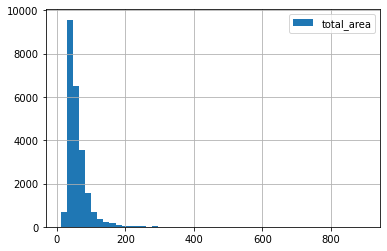

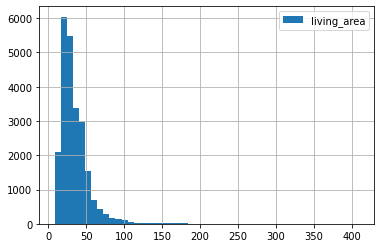

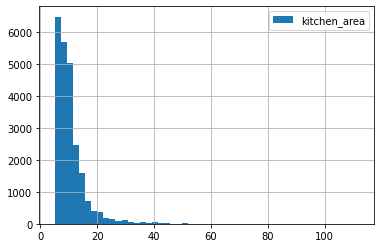

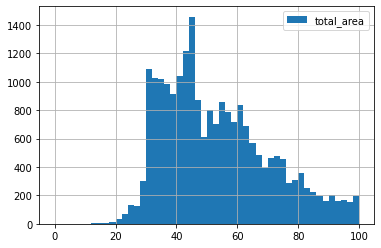

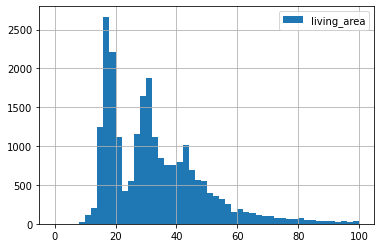

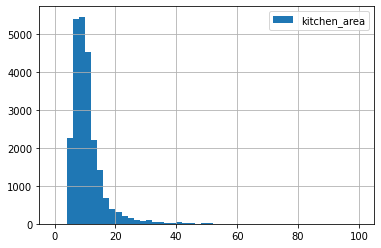

In [19]:
print(data[['total_area','living_area','kitchen_area']].describe())
data['total_area'].hist(bins=50, legend=True);
plt.show()
data['living_area'].hist(bins=50, legend=True);
plt.show()
data['kitchen_area'].hist(bins=50, legend=True);
plt.show()
data['total_area'].hist(bins=50, range=(0,100), legend=True);
plt.show()
data['living_area'].hist(bins=50, range=(0,100), legend=True);
plt.show()
data['kitchen_area'].hist(bins=50, range=(0,100), legend=True);
plt.show()

Гистограммы распределений общей площади, жилой площади и площади кухни похожи друг на друга. Эти параметры взаимосвязаны между собой, значит данные корректные. При рассмотрении этих гистограмм в диапазоне 0-100 м.кв. можно заметить что основная масса квартир имеет общую площадь 30-80 м.кв, жилую площадь 15-50 м.кв., площадь кухни 5-15 м.кв.

count    23650.000000
mean         6.541642
std         10.896378
min          0.430000
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64


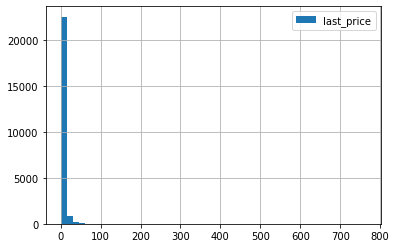

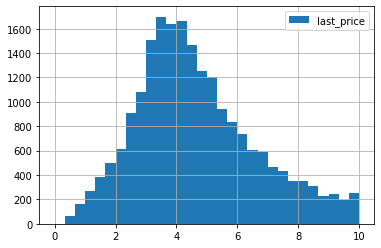

In [20]:
print(data['last_price'].describe())
data['last_price'].hist(bins=50, legend=True);
plt.show()
data['last_price'].hist(bins=30, range=(0,10), legend=True);
plt.show()

Гистограмма цены объекта неинформативная, из-за большого разброса цен. 75% объектов находятся в диапазоне до 6.8 млн. Рассмотрим гистограмму в диапазоне цен 0-10 млн. Распределение похоже на нормальное.

count    23650.000000
mean         2.078436
std          1.066393
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


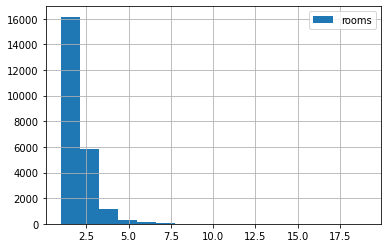

In [21]:
print(data['rooms'].describe())
data['rooms'].hist(bins=len(data['rooms'].unique()), legend=True); # каждая корзина соответствует определенному количеству комнат
plt.show()

Больше всего в продаже 1комн. квартир. Затем по убыванию 2комн., 3комн. и т.д. Похоже на распределение Пуассона.

count    23650.000000
mean         2.698747
std          0.252759
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64


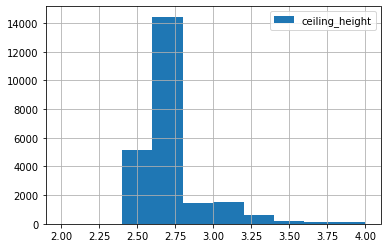

In [22]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=10, range=(2,4), legend=True);
plt.show()

Рассмотрим распределение потолков в диапазоне от 2м до 4м. Основная масса квартир имеет потолки высотой от 2.4м до 2.7м.

              floor  floors_total
count  23650.000000  23650.000000
mean       5.893277     10.673784
std        4.883317      6.593455
min        1.000000      1.000000
25%        2.000000      5.000000
50%        4.000000      9.000000
75%        8.000000     16.000000
max       33.000000     60.000000


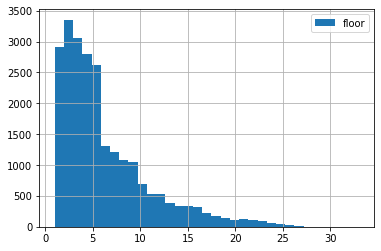

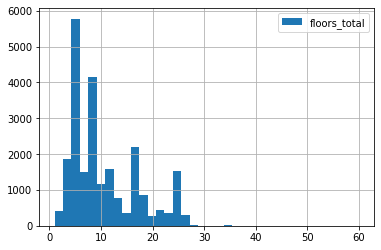

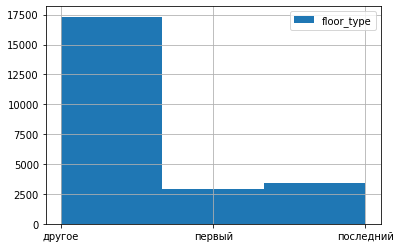

In [23]:
print(data[['floor', 'floors_total']].describe())
data['floor'].hist(bins=len(data['floor'].unique()), legend=True);
plt.show()
data['floors_total'].hist(bins=len(data['floors_total'].unique()), legend=True);
plt.show()
data['floor_type'].hist(bins=3, legend=True);
plt.show()

Большинство квартир продается на 1-4 этажах. Распределние этажей в продаваемых квартирах похоже на распределение Пуассона. По количеству этажей в доме самые популярные 5эт., 9эт. и 16эт. здания. По типу этажа количество первых и последних этажей примерно одинаковое. Преобладает категория другое (не первый и не последний). По типу распределения ничего не сказать, так как переменная категориальная.

       cityCenters_nearest  airports_nearest  parks_nearest
count         18139.000000      18116.000000    8064.000000
mean          14197.860742      28803.225878     490.830729
std            8606.830295      12637.314144     342.554386
min             181.000000          0.000000       1.000000
25%            9241.000000      18575.750000     288.000000
50%           13105.000000      26756.500000     454.500000
75%           16293.000000      37294.000000     612.000000
max           65968.000000      84869.000000    3190.000000


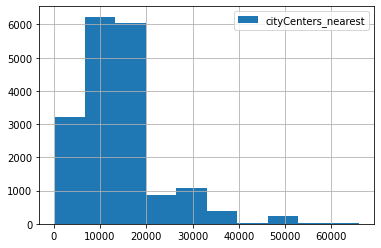

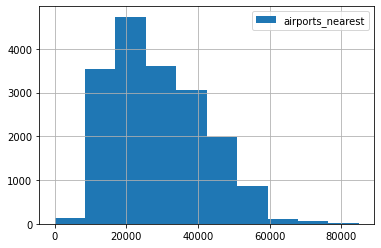

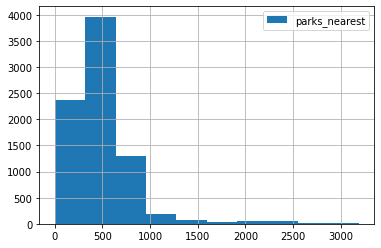

In [24]:
print(data[['cityCenters_nearest', 'airports_nearest', 'parks_nearest']].describe())
data['cityCenters_nearest'].hist(bins=10, legend=True);
plt.show()
data['airports_nearest'].hist(bins=10, legend=True);
plt.show()
data['parks_nearest'].hist(bins=10, legend=True);
plt.show()

Большинство квартир продаётся в радиусе 20000м от центра города. Расстояние до аэропорта в большинстве случаев от 15000м до 50000м. Расстояние до парка в основном менее 900м, но необходимо учесть что это расстояние указано только для 8064 квартир, а остальные 15586 значений пропущены (около 66%). Для расстояния до аэропорта и до центра города пропущенные значения состовляют около 5500(около 23%).

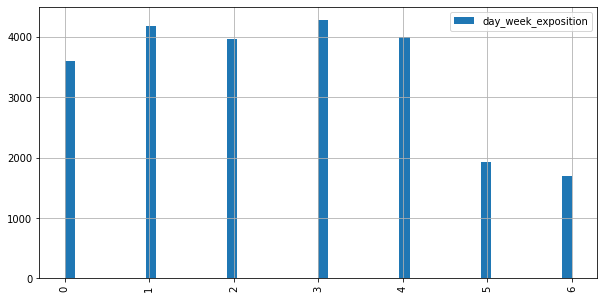

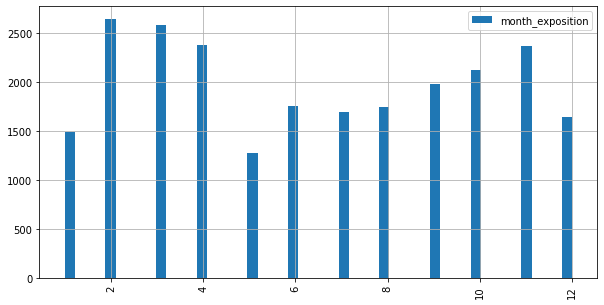

In [25]:
data['day_week_exposition'].hist(bins=50, xrot=90, figsize=(10,5), legend=True);
plt.show()
data['month_exposition'].hist(bins=50, xrot=90, figsize=(10,5), legend=True);
plt.show()

На гистограмме `day_week_exposition` видно: объявления публиковались в основном в будние дни.  
По гистограмме `month_exposition` видно: чаще всего недвижимость продают в феврале, марте, апреле и ноябре. Реже всего в мае и декабре.

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
- Построим гистограмму.
- Посчитем среднее и медиану.
- Определим сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


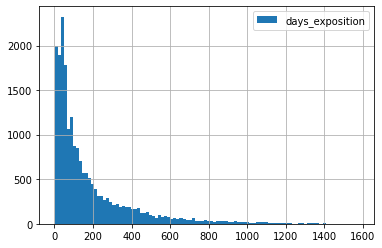

In [26]:
print(data['days_exposition'].describe())
data['days_exposition'].hist(bins=100, legend=True);
plt.show()

Среднее время продажи квартиры 180 дней, медианное - 95 дней. Соответственно большинство квартир продаётся менее чем за 100 дней. 25% квартир продается до 45 дней, будем считать что это быстрые продажи. 75% квартир продаётся за 231 день, всё что свыше этого будем считать долгими продажами.

Какие факторы больше всего влияют на общую (полную) стоимость объекта?  
 Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. 

              last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.653809     0.586579      0.515167  0.365288
total_area      0.653809    1.000000     0.946313      0.659598  0.760643
living_area     0.586579    0.946313     1.000000      0.502364  0.831911
kitchen_area    0.515167    0.659598     0.502364      1.000000  0.322489
rooms           0.365288    0.760643     0.831911      0.322489  1.000000


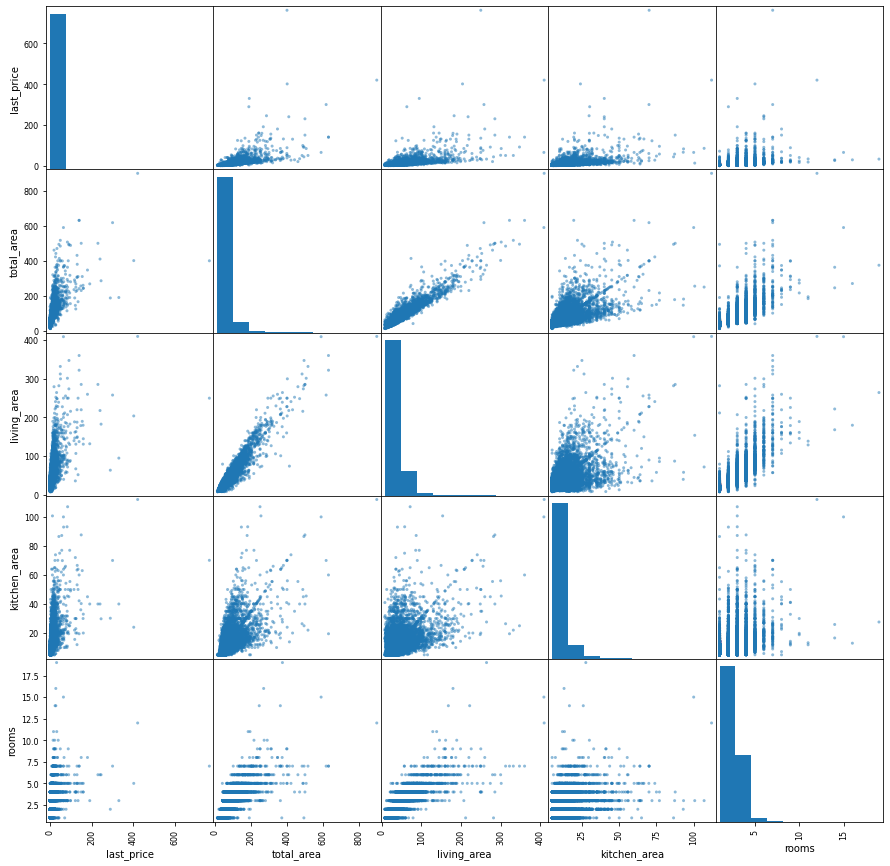

In [27]:
print(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr())
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']], figsize=(15,15));

Для сравнения количественных величин используем коэффициенты корреляции и матрицу диаграм рассеяния.  
С увеличением общей площади, жилой площади и площади кухни заметен рост цены квартиры. Коэффициенты корреляции 0.653809, 0.586579, и 0.515167 соответственно. А вот при увеличении количества комнат однозначного увеличения стоимости квартиры не прослеживается. До 5-8 комнат наблюдается рост цены, потом спад. Коэффициент корреляции 0.365288.

floor_type  другое  первый  последний
last_price  4.8485     3.9       4.35
AxesSubplot(0.125,0.125;0.775x0.755)


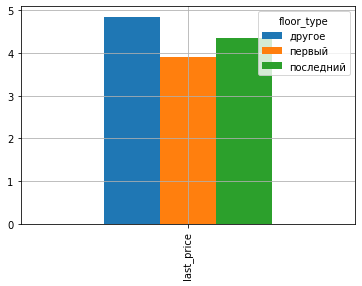

In [28]:
print(data.pivot_table(values='last_price', columns='floor_type', aggfunc='median'))
print(data.pivot_table(values='last_price', columns='floor_type', aggfunc='median').plot(kind='bar', grid=True));

Квартиры на первых этажах самые дешёвые, а самые дорогие квартиры из категории другое (не первый и не последний).

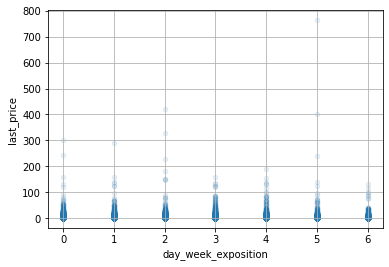

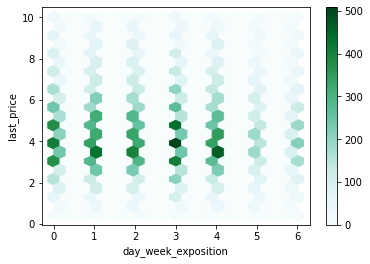

In [29]:
data.plot(x='day_week_exposition', y='last_price', kind='scatter', alpha=0.1, grid=True);
data.query('last_price < 10').plot(x='day_week_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False);


Цены квартир мало зависят от дня недели размещения объявления.Самые дорогие вартиры были выставленны в среду и в субботу, но это единичные случаи. Если рассматривать квартиры до 10 млн (а их большинство) можно заметить что квартиры опубликованные в будни дороже квартир опубликованных в выходные.

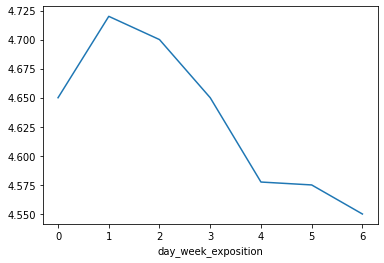

In [30]:
data.groupby('day_week_exposition')['last_price'].median().plot();

Если смотреть по медианным значениям цены, то квартиры, выставленные в начале недели - дороже.

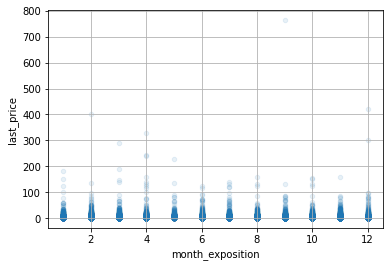

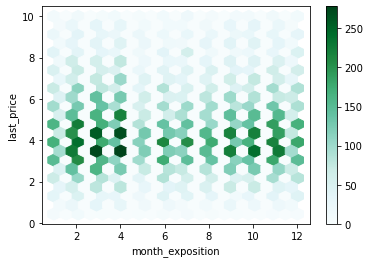

In [31]:
data.plot(x='month_exposition', y='last_price', kind='scatter', alpha=0.1, grid=True);
data.query('last_price < 10').plot(x='month_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False);

С мая по август наблюдается спад цен на квартиры ценой до 10 млн.

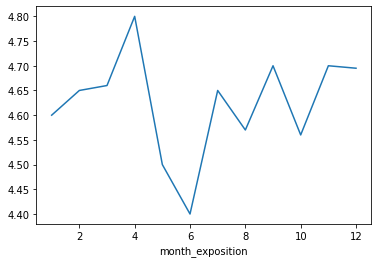

In [32]:
data.groupby('month_exposition')['last_price'].median().plot();

Если считать по медианным значениям цен, то после пика в апреле начинается спад до июня, потом опять цены идут в сторону увеличения.

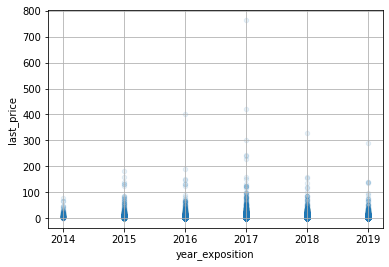

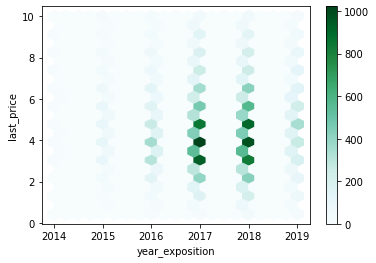

In [33]:
data.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.1, grid=True);
data.query('last_price < 10').plot(x='year_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False);

В целом наблюдается тенденция увеличения цен на квартиры с 2014 по 2017, затем спад с 2018 по 2019. Если рассматривать квартиры до 10 млн тенденция такая же.

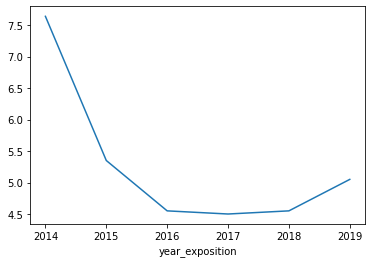

In [34]:
data.groupby('year_exposition')['last_price'].median().plot();

А вот если построить график по медианным ценам на квартиры, то результат обратный. Пик в 2014 году, спад до 2018 года и рост в сторону 2019.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: 

locality_name
санкт-петербург         15721
лен. обл., мурино         556
лен. обл., шушары         440
всеволожск                398
пушкин                    369
колпино                   338
лен. обл., парголово      327
гатчина                   307
лен. обл., кудрово        299
выборг                    237
Name: price_square_m, dtype: int64


locality_name,всеволожск,выборг,гатчина,колпино,"лен. обл., кудрово","лен. обл., мурино","лен. обл., парголово","лен. обл., шушары",пушкин,санкт-петербург
price_square_m,68653.997487,58141.468354,68745.684039,75424.14497,92473.070234,85681.30036,90175.477064,78676.893182,103125.352304,114855.6595


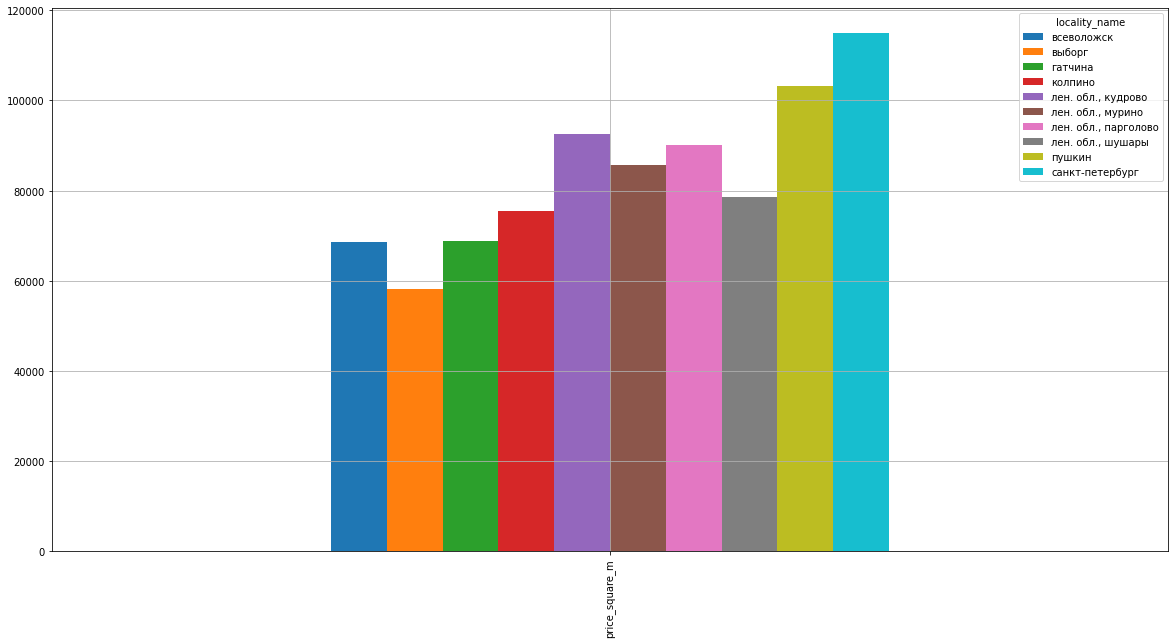

In [35]:
group_locality = data.groupby('locality_name')
top_group_locality = group_locality['price_square_m'].count().sort_values(ascending=False)[:10]
print(top_group_locality)
top_list = top_group_locality.index
top_price_square_m = data.query('locality_name in @top_list').pivot_table(values='price_square_m', columns='locality_name', aggfunc='mean')
display(top_price_square_m)
top_price_square_m.plot(kind='bar', figsize=(20,10), grid=True);
#price_locality_count = group_locality.count().sort_values(ascending=False)
#price_locality_square_m = group_locality
#print('10 населённых пунктов с наибольшим числом объявлений: \n', price_locality_count.head(10))

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра:  
В топ 10 самых популярых населённых пунктов самая высокая цена за квадратный метр в Санкт-Петербурге - около 115 тысяч за квадратный метр. Самая низкая цена в Выборге, около 60 тысяч за квадратный метр.

In [36]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15721,5.500
"лен. обл., мурино",556,3.400
"лен. обл., шушары",440,3.950
всеволожск,398,3.450
пушкин,369,5.180
колпино,338,3.600
"лен. обл., парголово",327,4.100
гатчина,307,3.100
"лен. обл., кудрово",299,3.790


Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

cityCenters_nearest_km,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
price_square_m,245833.111111,177004.932292,157848.548387,121386.982857,133282.418605,140509.329348,151011.737864,156176.442857,125671.01675,113318.988196,112727.058414,108630.386248,107488.263551,108147.679478,104251.929633,104231.524235,100542.145455,96597.197055,96361.816092,98652.299363,103044.77551,94469.119658,91329.955446,91828.047059,85736.461538,91531.038462,89285.415094,132115.0,81161.571429,72952.666667


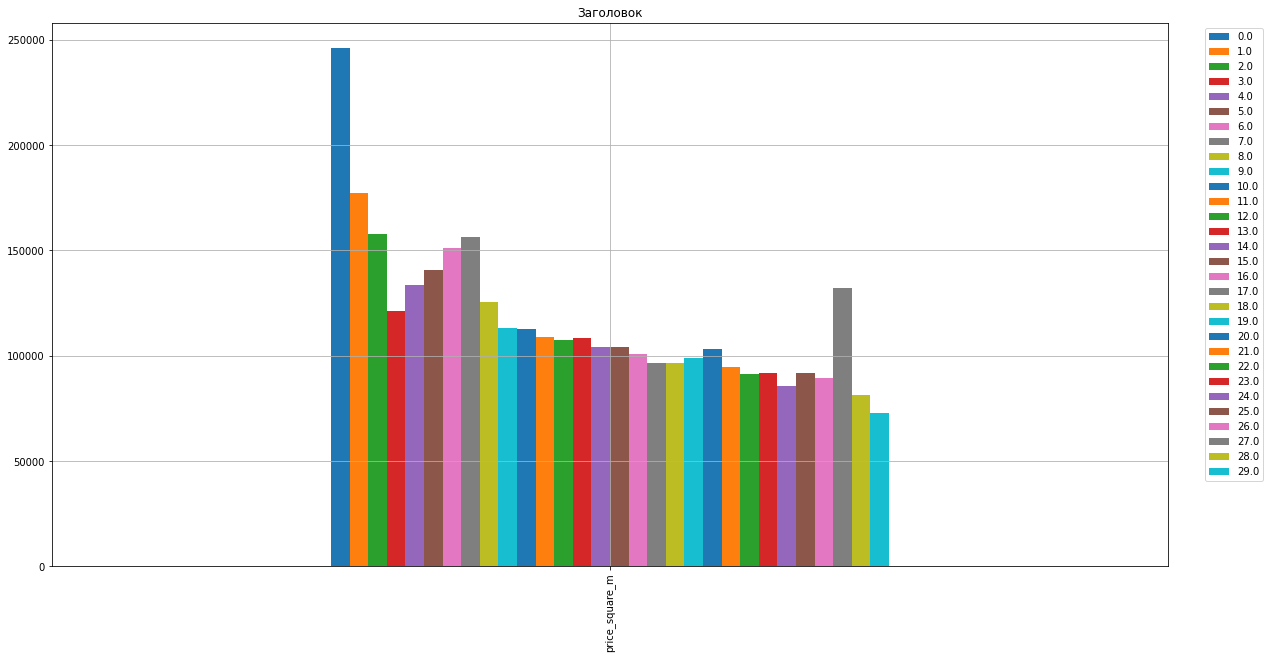

In [37]:
data_sp = data[data['locality_name'] == 'санкт-петербург']
price_km_sp = data_sp.pivot_table(values='price_square_m', columns='cityCenters_nearest_km')
display(price_km_sp)
price_km_sp.plot.bar(figsize=(20,10), grid=True);
plt.legend(bbox_to_anchor=(1.09, 1))
plt.title('Заголовок');


В Санкт-Петербурге наблюдается тенденция - чем ближе к центру города, тем выше цена квадратного метра недвижимости. По некоторым значениям удалённости значения цены выбиваются из общей тенденции, это может быть связано с наличием в этих местах более премиального жилья или с нахождением в этих локациях значимых городских объектов.

### Общий вывод

В ходе исследования рынка недвижимости в Санкт-Петербурге и Ленинградской области были обнаружены следующие особенности:
- Основная масса квартир имеет общую площадь 30-80 м.кв, с жилой площадью 15-50 м.кв. и площадью кухни 5-15 м.кв.
- Большинство квартир находиться в диапазоне цен от 3.4 млн до 6.8 млн.
- Больше всего в продаже 1комн. квартир. Затем по убыванию 2комн., 3комн. и т.д.
- Основная масса квартир имеет потолки высотой от 2.4м до 2.7м.
- Большинство квартир продается на 1-4 этажах.
- По количеству этажей в доме самые популярные 5эт., 9эт. и 16эт. здания. 
- Большинство квартир продаётся в радиусе 20000м от центра города.
- Расстояние до аэропорта в большинстве случаев от 15000м до 50000м.
- Объявления о продаже квартир чаще публикуются в будние дни.
- Недвижимость чаще продают в феврале, марте, апреле и ноябре, реже всего в мае и декабре. 
- Среднее время продажи квартиры 180 дней, медианное - 95 дней. Быстрые продажи – до 45 дней, долгие – свыше 231 дня.
- С увеличением общей площади, жилой площади и площади кухни заметен рост цены квартиры.
- При увеличении количества комнат однозначного увеличения стоимости квартиры не прослеживается. До 5-8 комнат наблюдается рост цены, потом спад.
- Квартиры на первых этажах самые дешёвые, а самые дорогие квартиры из категории другое (не первый и не последний).
- Цены квартир мало зависят от дня недели размещения объявления.
- С мая по август наблюдается спад цен на квартиры ценой до 10 млн.
- Наблюдается тенденция увеличения цен на квартиры с 2014 по 2017, затем спад с 2018 по 2019. Если рассматривать медианную цену на квартиры, то наоборот - пик в 2014 году, спад до 2018 года и рост в сторону 2019.
- В топ 10 самых популярых населённых пунктов самая высокая цена за квадратный метр в Санкт-Петербурге - около 115 тысяч за квадратный метр. Самая низкая цена в Выборге, около 60 тысяч за квадратный метр.
- В Санкт-Петербурге наблюдается тенденция - чем ближе к центру города, тем выше цена квадратного метра недвижимости.
- В картографических данных много пропущенных значений (около 66% для ближайших прудов и парков, около 23% в расстоянии до аэропорта, центра города). Необходимо улучшить сбор картографических данных, добавить геометки и предложить пользователям выбирать населённых пункт/район. Также это позволит навести порядок в столбце `locality_name`в части неявных дубликатов названий населённых пунктов.
